In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
station = "Papa"

In [3]:
data = xr.load_dataset(f"../data/1_products/{station}_obs.zarr", engine="zarr")
data

<xarray.Dataset> Size: 4MB
Dimensions:    (time: 623, latitude: 12, longitude: 31)
Coordinates:
  * latitude   (latitude) float64 96B 46.5 47.5 48.5 49.5 ... 55.5 56.5 57.5
  * longitude  (longitude) float64 248B -157.5 -156.5 -155.5 ... -128.5 -127.5
  * time       (time) datetime64[ns] 5kB 1995-09-24 1995-09-25 ... 2020-08-31
Data variables:
    day        (time, latitude, longitude) float64 2MB nan nan nan ... nan nan
    night      (time, latitude, longitude) float64 2MB nan nan nan ... nan nan

# Remove outliers


In [4]:
q1 = data.quantile(0.25, dim=["time", "latitude", "longitude"])
q3 = data.quantile(0.75, dim=["time", "latitude", "longitude"])
iqr = q3 - q1

In [5]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [6]:
new_data = data.where((data > lower_bound) & (data < upper_bound))

In [21]:
print("Original data")
print(f"Number of observation = {int(data.day.notnull().sum() + data.night.notnull().sum())}")
print(f"Number of observation in same place during same day = {int((data.day.notnull() & data.night.notnull()).sum())}")

print("\nWithout outliers")
print(f"Number of observation = {int(new_data.day.notnull().sum() + new_data.night.notnull().sum())}")
print(
    f"Number of observation in same place during same day = {int((new_data.day.notnull() & new_data.night.notnull()).sum())}"
)

Original data
Number of observation = 757
Number of observation in same place during same day = 37

Without outliers
Number of observation = 709
Number of observation in same place during same day = 31


Text(0.5, 1.0, 'Number of days with day-night difference > 0')

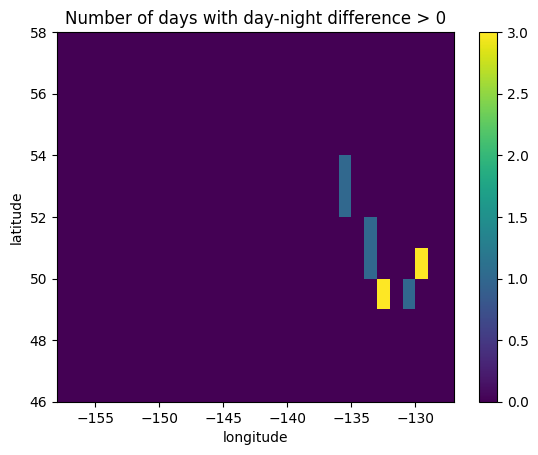

In [8]:
((xr.where(new_data.day.notnull() & new_data.night.notnull(), new_data.day - new_data.night, np.nan)) > 0).sum(
    "time"
).plot()
plt.title("Number of days with day-night difference > 0")

/Users/adm-lehodey/Documents/Workspace/Projects/Seapopym-optimisation/.venv/lib/python3.12/site-packages/xarray/groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


Text(0.5, 1.0, 'Number of days with day-night difference > 0')

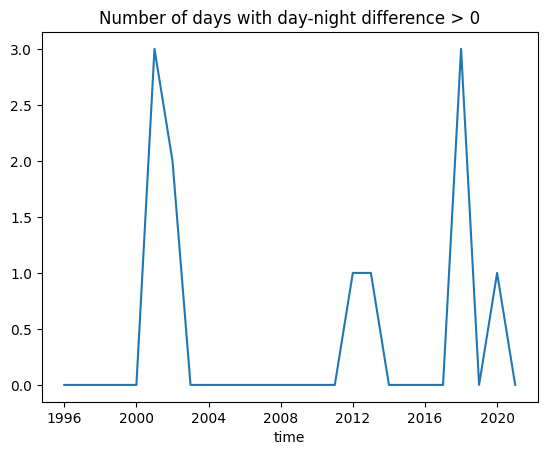

In [9]:
((xr.where(new_data.day.notnull() & new_data.night.notnull(), new_data.day - new_data.night, np.nan)) > 0).sum(
    ["latitude", "longitude"]
).resample({"time": "1Y"}).sum().plot()
plt.title("Number of days with day-night difference > 0")

# Remove observations when day > night


In [10]:
# to_remove = new_data["day"].where(new_data["day"] > new_data["night"]).dropna("time").time
# new_data = new_data.drop_sel(time=to_remove)
# to_remove.to_series()

## DAY


In [11]:
# data.day.dropna("time").plot(label="Original")
# new_data.day.dropna("time").plot(label="Filtered")
# plt.legend()
# plt.title("Day observations")

## NIGHT


In [12]:
# data.night.dropna("time").plot(label="Original")
# new_data.night.dropna("time").plot(label="Filtered")
# plt.legend()
# plt.title("Night observations")